# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.9578947368421052

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Grizzly bears    0.964286
Teddybears       1.000000
Black bears      0.916667
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Grizzly bears,Teddybears,Black bears
Grizzly bears,27,0,1
Teddybears,0,31,0
Black bears,3,0,33


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,prediction_error,Grizzly bears_prediction,Teddybears_prediction,Black bears_prediction,Grizzly bears_true,Teddybears_true,Black bears_true,confidence
22,0.664221,0.985720,0.010611,0.003668,0,0,1,0.978599
93,0.649156,0.973633,0.000101,0.026266,0,0,1,0.960716
8,0.516102,0.774020,0.000133,0.225847,0,0,1,0.689326
15,0.375916,0.436126,0.008656,0.555218,1,0,0,0.497817
79,0.312587,0.382169,0.086712,0.531119,0,0,1,0.391777


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,prediction_error,Grizzly bears_prediction,Teddybears_prediction,Black bears_prediction,Grizzly bears_true,Teddybears_true,Black bears_true,confidence
79,0.312587,0.382169,8.671217e-02,0.531119,0,0,1,0.391777
9,0.253036,0.259272,1.202813e-01,0.620446,0,0,1,0.447174
15,0.375916,0.436126,8.656143e-03,0.555218,1,0,0,0.497817
82,0.241877,0.362815,3.028816e-07,0.637185,0,0,1,0.553587
77,0.201213,0.698180,3.834071e-04,0.301437,1,0,0,0.606200


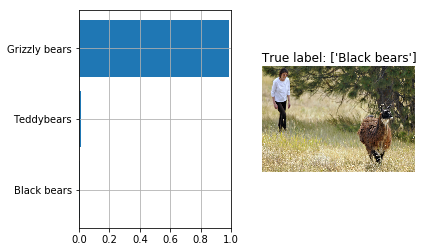

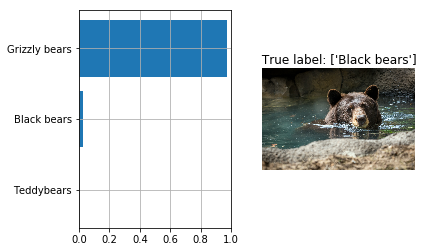

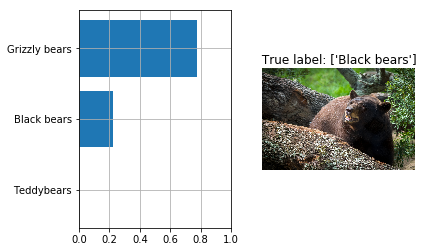

In [15]:
interpreter.plot_most_incorrect_samples(3)

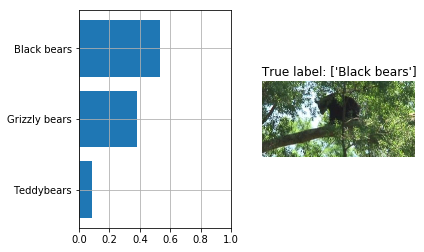

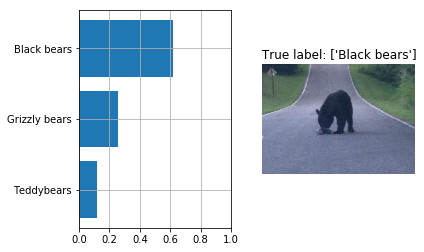

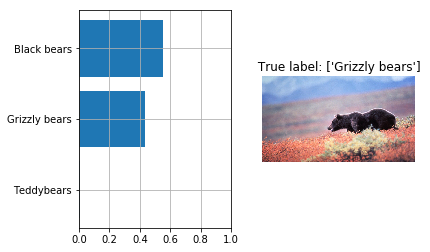

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=94), Output()), _do…